<a href="https://colab.research.google.com/github/D33PAK-6AJJA7A/PneumoniaDetector/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from glob import glob
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from matplotlib import pyplot as plt 
from keras.optimizers import Adam
import os
import cv2

In [ ]:
data_dir = "/content/drive/My Drive/chest_xray"
train_dir= data_dir + "/train/"
test_dir= data_dir + "/test/"
val_dir= data_dir + "/val/"

Text(0.5, 1.0, 'PNEUMONIA')

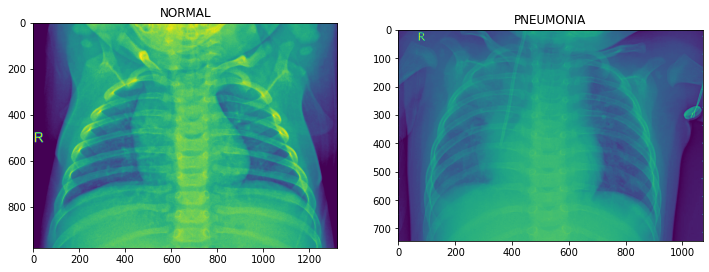

In [ ]:
normal_img = glob(train_dir + "NORMAL/*.jpeg")
pneumonia_img = glob(train_dir + "PNEUMONIA/*.jpeg")

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(np.asarray(plt.imread(normal_img[0])))
plt.title("NORMAL")

plt.subplot(1,2,2)
plt.imshow(np.asarray(plt.imread(pneumonia_img[0])))
plt.title("PNEUMONIA")


In [ ]:
labels = ['NORMAL','PNEUMONIA']
img_size = 400

def read_data(image_path):
    print("Reading from Directory : ",image_path)
    X = []
    y = []     
    
    for label in labels:
        print("Subfolder : ", label)
        
        img_cnt = 0;
        path = image_path + label
        for image in os.listdir(path):    
            img = cv2.imread(path + '/' + image,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img,(img_size,img_size))
                
            X.append(img)
            y.append(labels.index(label))
            
            img_cnt += 1
        pass        
            
        print("Done. Read ",img_cnt," Images")
    
    X = np.array(X)*(1.0/255)
    X = X.reshape(-1,img_size,img_size,1)
    y = np.array(y)
        
    return X,y    

In [ ]:
X_train,y_train = read_data(train_dir)
X_test,y_test = read_data(test_dir)
X_val,y_val = read_data(val_dir)

Reading from Directory :  /content/drive/My Drive/chest_xray/train/
Subfolder :  NORMAL
Done. Read  1341  Images
Subfolder :  PNEUMONIA


In [ ]:
X_train[0].shape

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=X_train[0].shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(1024, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
final = model.fit(X_train,y_train,epochs=5,batch_size=64,validation_data=(X_val,y_val),shuffle=True)

In [ ]:
plt.plot(final.history['acc'],label='Train Accuracy')
plt.plot(final.history['val_acc'],label='Test Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()

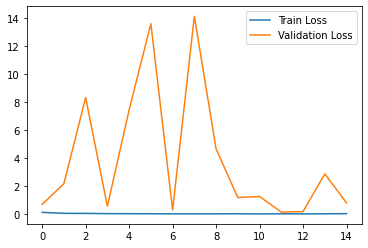

In [ ]:
plt.plot(final.history['loss'],label='Train Loss')
plt.plot(final.history['val_loss'],label='Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [ ]:
model.evaluate(test_batches)

624/624 [==============================] - 0s 741us/sample - loss: 2.4946 - acc: 0.7196


[2.4945776313125645, 0.71955127]

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred>0.5,1,0)

Text(33.0, 0.5, 'Actual')

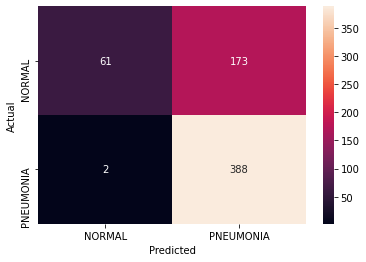

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

sb.heatmap(cm,annot=True,fmt='g',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')